<a href="https://colab.research.google.com/github/wnyngj/class2022spring/blob/main/scikit_learn0330-0404.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-Learn for machine learning

Scikit-러닝은 머신러닝에서 한 라이브러리

머신러닝은 딥러닝을 포함함.
*딥러닝: 인공신경망

머신러닝의 종류

1. supervised learning 함수(입출력이 있어야한다) - 
ㄱ. regression출:숫자 
ㄴ. classification출:카테고리

NN이 요즘 쓰는 것이고 Naive Bayes, SVM, Logistic regression은 요즘 안씀

2. Unsupervised learning 그냥 데이터. -
ㄱ. dimensionality(수학,영어 그래프) ㄴ. clustering

In [1]:
import seaborn as sns   #stat plotting관련해서도 많이 나오는 seaborn library
df = sns.load_dataset('iris')   
#머신러닝에서 가장 많이 나오는 ..iris데이터

#regression - linear - y=ax+b 입출력 둘다 숫자
#입력이 하나여도 가능, 두개여도 가능

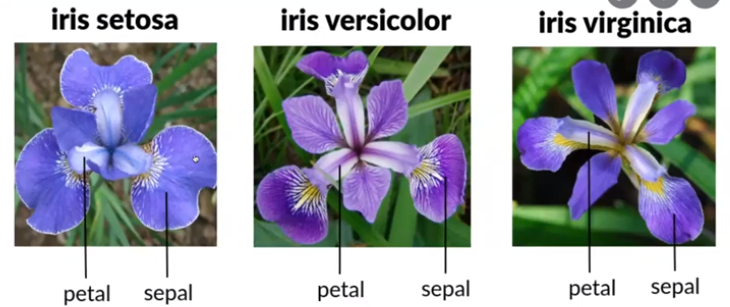

In [2]:
type(df)    #데이터프레임(엑셀표) 형태임

pandas.core.frame.DataFrame

In [3]:
df.head()  
 #총150개의 iris. 3가지 붓꽃 종류 50개는 setosa, 50개는 versicolor, 50개는 virginica 
 #3가지 붓꽃 종류의 꽃잎,꽃받침의 길이나 너비 등을 기록해서 기계에 학습시키는 것

 #supervised 중 regression하려면 - sepal length입력해서 sepal width 알 수 있게
 #classification 하려면 - sepal length부터 petal_width넣어서 species 출력하기

 #Unsupervised 중 dimensional 하려면 - 4개의 구분 종류를 각각의 차원으로 설정한뒤, 2차원으로 줄이기
 #clustering하려면 4개의 구분 종류들중 몇개를 뭉치게

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df['species'].unique()    #species의 column들 중 unique한 것들만 불러오기

array(['setosa', 'versicolor', 'virginica'], dtype=object)

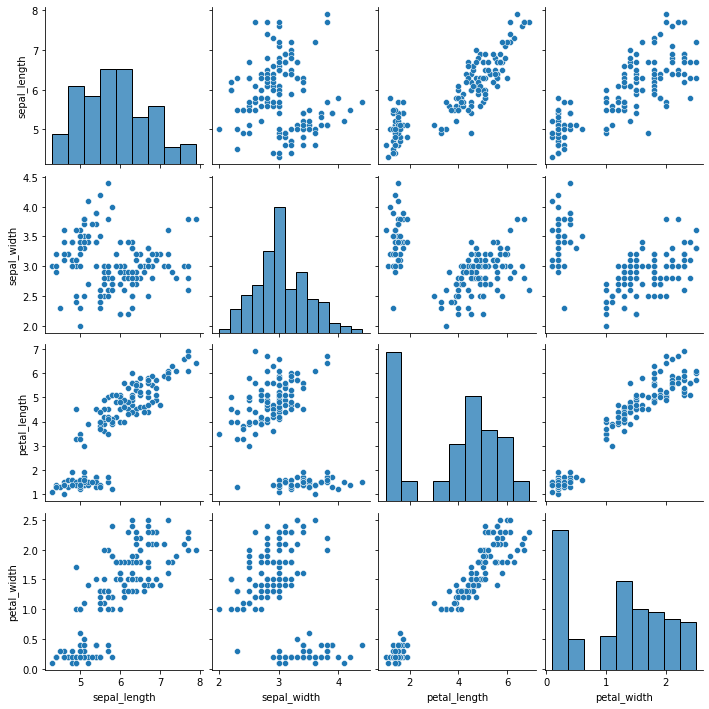

In [5]:
sns.pairplot(df)
#pairwise한 표, mirror관계는 중복되는 것들도 있지   
#대각선 부분은 xy같으니 히스토그램으로 데이터분포 나타냄

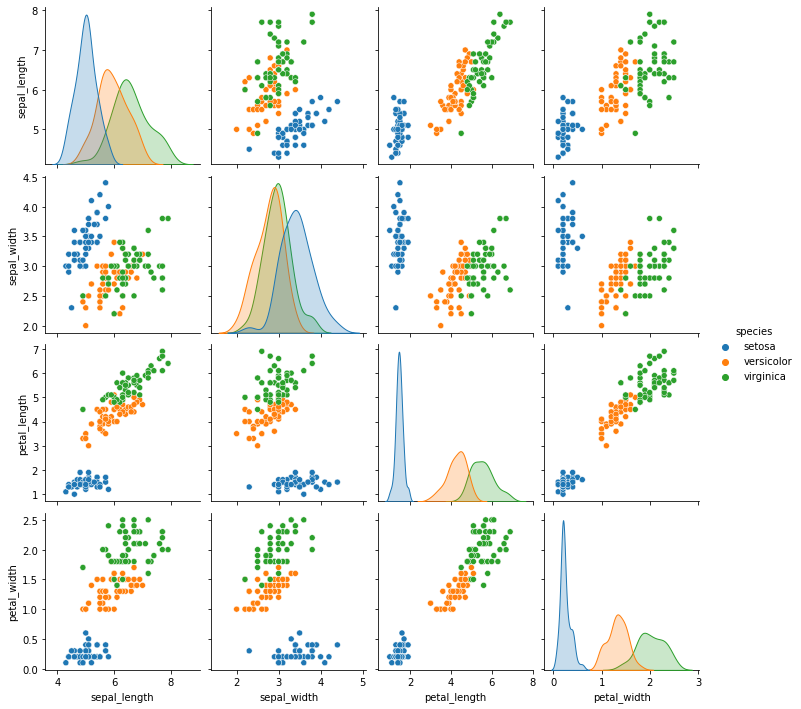

In [6]:
sns.pairplot(df, hue='species')   #색깔hue을 종별species로 하자

df를 pairplot에 몽땅 넣는 것이 아니라
원하는 것만 떼어서 볼 수 없을까?

Text(0, 0.5, 'sepal_width')

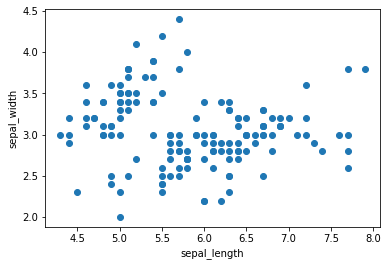

In [7]:
x = list(df['sepal_length'])    #x에 150개의 숫자들을 list에 넣고
y = list(df['sepal_width'])   #y에 150개의 숫자들을 list에 넣고

 #pairplot하지 않고도 matplotlib 사용해서 볼 수 있음
import matplotlib.pyplot as plt
plt.scatter(x, y);   

plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

setosa만 따로 보자

In [10]:
df['species']=='setosa'

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: species, Length: 150, dtype: bool

In [ ]:
df[df['species']=='setosa']

In [ ]:
df_setosa = df[df['species']=='setosa'] 
#문제: 이것의 dimension구조는? row 50개, column5개 -총 4개의 이파리 정보+setosa라는 카테고리 정보
df_setosa

Text(0.5, 1.0, 'setosa')

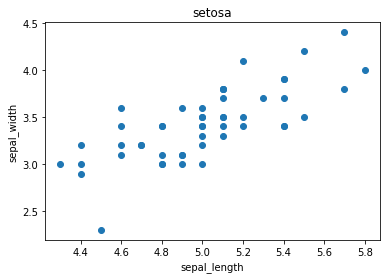

In [12]:
x = list(df_setosa['sepal_length'])
y = list(df_setosa['sepal_width'])
plt.scatter(x, y);

#visualize에 decorate하자
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('setosa')

### Supervised learning: regression (linear regression)

함수가 뭐든 출력이 숫자만 나오면 regression

이 중 y=ax+b 은 linear regression(+랑 x만 있는것)

그 외 지수함수 로그함수 2차함수...곡선 함수는 non-linear regression

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression(fit_intercept=True) #intercept(= y절편)=True(=고려한다)

In [15]:
import numpy as np
x = np.array(x)   #아까 만든 것 setosa의 sepal length, 50개의 입력값이 리스트에 있음
y = np.array(y)   #아까 만든 것 setosa의 sepal width, 50개의 출력값이 리스트에 있음

#모든 머신러닝은 array의 형태로 만들어줘야함.

In [16]:
x

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

In [ ]:
x.shape   #50개의 숫자 있는 1d array(1차원)

# model은 데이터를 2차원으로 만들어야함
by reshape함수

In [20]:
x.reshape(50, 1) #1차원을 2차원으로
x.reshape(2,25) #reshape함수 쓰면 구조 언제든 바꿀 수 있음 숫자만 50으로 맞으면 노상관

array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8],
       [5. , 5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9,
        4.4, 5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ]])

In [ ]:
x.reshape(5,5,2) #3차원으로도 가능~ 

In [45]:
X = x.reshape(-1, 1)    #-1:알아서 계산 결과 맞게 해줘,그럼 여기선 50이겠지
X.shape

(50, 1)

In [25]:
model.fit(X, y) #y=axb 틀을 model이라고 부르는데, 
#이 함수는 line을 제대로 알아내게 함. 즉 a와 b값을 아는 것

LinearRegression()

In [26]:
model.coef_ #coef(계수,즉 기울기a)

array([0.7985283])

In [27]:
model.intercept_   #intercept(y절편b)

-0.569432673039648

# 만든 model(linear regression)을 바탕으로 x값에 따른 y값 구해주기

In [ ]:
xfit = np.linspace(4, 6)    #=(4, 6, 50)4에서 6까지 총 50개로 나누어라
xfit

In [ ]:
Xfit = xfit.reshape(-1, 1)
Xfit

In [39]:
yfit = model.predict(Xfit)    #ab값이 정해진 모델에 x값 넣어 y값 구하는 것
#Q. Xfit은 (50,1)인데 yfit의 dimension은 ? 1d array, (50,)
yfit

array([2.62468053, 2.65727352, 2.68986651, 2.72245951, 2.7550525 ,
       2.78764549, 2.82023848, 2.85283147, 2.88542446, 2.91801746,
       2.95061045, 2.98320344, 3.01579643, 3.04838942, 3.08098242,
       3.11357541, 3.1461684 , 3.17876139, 3.21135438, 3.24394737,
       3.27654037, 3.30913336, 3.34172635, 3.37431934, 3.40691233,
       3.43950533, 3.47209832, 3.50469131, 3.5372843 , 3.56987729,
       3.60247029, 3.63506328, 3.66765627, 3.70024926, 3.73284225,
       3.76543524, 3.79802824, 3.83062123, 3.86321422, 3.89580721,
       3.9284002 , 3.9609932 , 3.99358619, 4.02617918, 4.05877217,
       4.09136516, 4.12395816, 4.15655115, 4.18914414, 4.22173713])

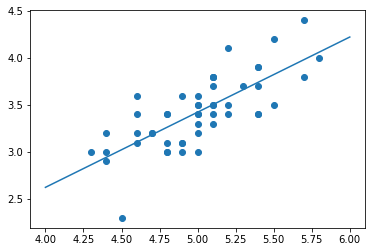

In [46]:
plt.scatter(x, y)
plt.plot(xfit, yfit);
 
#다시 정리: linear regression: x랑y를 관통하는 직선(linear)을 구하는 것
#왜해?: 만들어두면 나중에 sepal length를 구했을 때 sepal width 를 예측할 수 있으니까!

In [ ]:
df_setosa.corr()    #x,y분포가 있을 때 이 분포들이 얼마나 집약하여 분포하는지
#r값! r값이 클수록(1에 가까울 수록) x,y의 비례정도가 크다

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.742547,0.267176,0.278098
sepal_width,0.742547,1.000000,0.177700,0.232752
petal_length,0.267176,0.177700,1.000000,0.331630
petal_width,0.278098,0.232752,0.331630,1.000000


# gradio implementation

In [47]:
!pip install gradio
import gradio as gr

def test (x):
  X = np.array(x).reshape(-1,1)
  y = model.predict(X)
  return y[0]

iface = gr.Interface(test, inputs = ["number"], outputs = ["text"])
iface.launch(debug=True)

Keyboard interruption in main thread... closing server.


(<fastapi.applications.FastAPI at 0x7f7eb5e25c10>,
 'http://127.0.0.1:7860/',
 'https://37279.gradio.app')

### Supervised learning: classification (Naive Bayes)

-classification중에 Naive Bayes 이외에도 SVM, Logistic regression,NN(요즘 많이 씀) 가 있음

In [48]:
x = df.drop('species', axis=1) # axis = 0 (delete row) / 1 (delete column)
x.shape

(150, 4)

In [50]:
y = df['species']
y.shape

(150,)

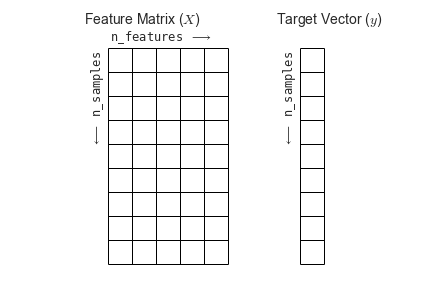

In [59]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, random_state=1)
#위에 있는 x,y를 Xtrain, Xtest, ytrain, ytest으로 쪼갬
#왜 쪼갬? train데이터는 fit에만 쓸 것, test데이터는 test용 데이터(predict)

In [61]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
#함수 구해진 상태

GaussianNB()

In [62]:
y_model = model.predict(Xtest)             # 4. predict on new data
#y_model: x값에 Xtest 넣어서(38개의 데이터) y값 유추하기

In [53]:
from sklearn.metrics import accuracy_score #이 모델이 얼마나 정확한지
accuracy_score(ytest, y_model)
#y_model: 모델이 예측한 것
#ytest: 실제 데이터 값

0.9736842105263158

# gradio implementation

In [ ]:
import pandas as pd
def test (in1, in2, in3, in4):
  data = {'sepal_length': [in1],
        'sepal_width': [in2],
        'petal_length': [in3],
        'petal_width': [in4]}
  Xtest = pd.DataFrame(data)
  yout = model.predict(Xtest)
  return yout

iface = gr.Interface(test, inputs = ["number", "number", "number", "number"], outputs = ["text"])
iface.launch()

### Unsupervised learning: dimensionality (PCA)

Principal Component Analysis 

-경제,통계학과 에서 배우는 가장 기본적인 것, 너무 중요함



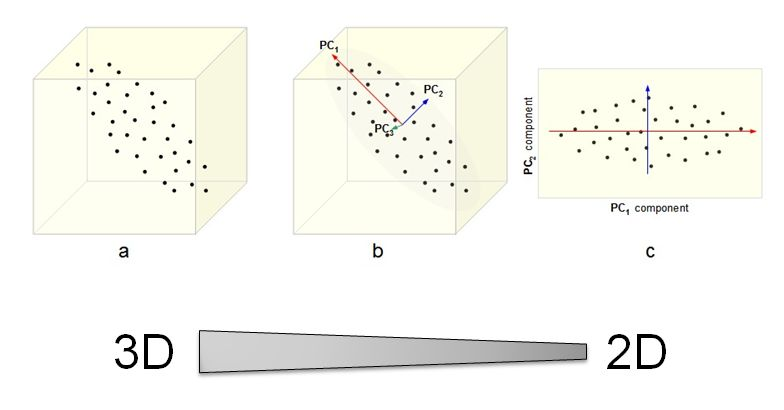

a = 하나의 숫자는 3차원 ex.[15,3,7]

iris data는 4차원이었음 [x,y,z,w] 하나의 숫자는 4차원 공간에서의 한 점과 일치한다. 


a의 원점을 각도 유지한 채로 이동시켜서rotate시켜서 b의 데이터에 관통할 수 있게 만들어주기

(axis를 옮겨주는 것)

a의 원점에서 직각의 관계인 3개의 축 x1,x2,x3은 b에서 pc1,pc2,pc3로 바뀌고,

여기서 pc3의 길이가 매우 작으면 pc3을 무시하고 pc1,2 두개의 축으로 2차원으로 축소할 수 있음


왜 차원 축소를 하지?
아까 iris data 4개였지
영어, 수학, 국어, 과학 점수를 예로 들어서, 
4차원을 언어능력(영어,국어)과 수리능력(수학, 과학)  2차원으로 축소할 수 있음


In [64]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(x)                           # 3. Fit to data. Notice y is not specified!
#supervised는 model fit에서 x,y 두개 썼었지만 여기선 x만
#x엔 sepal length, width, petal lenth, width 총 '4개의 차원'
X_2D = model.transform(x)  
#사진에서 a에서 c로
#pc1, pc2가 추가로 만들어진 것



In [ ]:
df['PCA1'] = X_2D[:, 0]
df['PCA2'] = X_2D[:, 1]
df
#공통적인 2개의 특성을 뽑아낸 것 pca1, pca2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


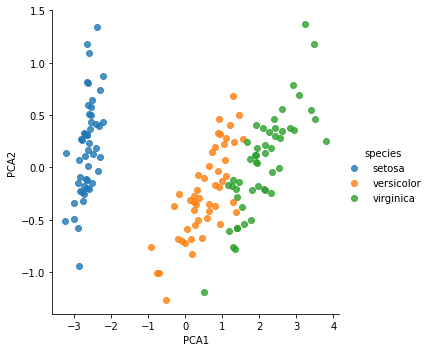

In [66]:
sns.lmplot("PCA1", "PCA2", hue='species', data=df, fit_reg=False);
#2차원으로 차원축소하고 나니 4차원의 iris데이터도 좌표위에 표현도 가능해진 것

### Unsupervised learning: clustering (GMM)

Goussian Mixture Model

두 개의 정규분포가 있으니 너가 알아서 fit해라

1차원상에서 데이터가 clustered 되어있음
왼쪽에 있는 cluster을 A라고 하고
오른쪽에 있는 cluster을 B라고 하기

마찬가지로 4차원에서도 2개 혹은 3개로 쪼갤 수 있다.

In [68]:
from sklearn.mixture import GaussianMixture as GMM   # 1. Choose the model class
model = GMM(n_components=3, covariance_type='full')  # 2. Instantiate the model with hyperparameters
#4차원에 존재하지만, 덩어리가 3개(setosa,versicolor,verginica) 있다는 걸 알 수 있음. 
#그래서 n_component에 3이라고 쓰기
model.fit(x)                                         # 3. Fit to data. Notice y is not specified!
#흩뿌려진 데이터들을 억지로라도 3개의 덩어리로 label하는 과정
y_gmm = model.predict(x)                             # 4. Determine cluster labels
y_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [71]:
df['cluster'] = y_gmm

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


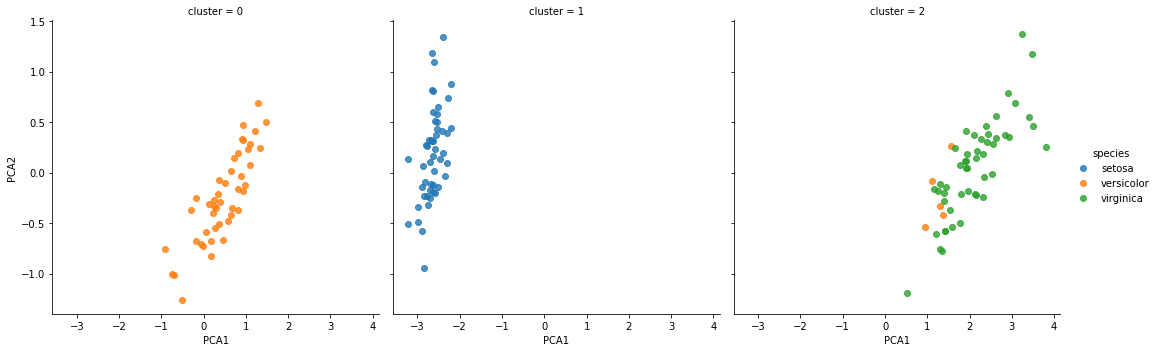

In [72]:
sns.lmplot("PCA1", "PCA2", data=df, hue='species', col='cluster', fit_reg=False);
#cluster을 기준으로 3개로 나눈 것